In [14]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from gensim import matutils
import numpy as np
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [27]:
def scatter_terms(term1,term2,model_name):
    terms = [term1,term2]
    model = models[model_name]
    tdata=dict()
    for t in terms:
        tdata[t] = dict()
        tdata[t]['response'] = model.most_similar(t,topn=25)
        tdata[t]['neighbor_list'] = list()
        tdata[t]['words'] = list()

        # add search term
        tdata[t]['words'].append(t)
        tdata[t]['neighbor_list'].append(model[t])

        for i in tdata[t]['response']:
            tdata[t]['words'].append(i[0])
            tdata[t]['neighbor_list'].append(model[i[0]])
            
    tdata_labels=list()
    tdata_neighbor_list=list()
    tdata_words=list()
    for t in sorted(tdata.keys()):
        tdata_labels.append(t)
        tdata_neighbor_list = tdata_neighbor_list + tdata[t]['neighbor_list']
        tdata_words = tdata_words + (tdata[t]['words'])
        
    pca = PCA(n_components=2)

    plot_data = pca.fit_transform(tdata_neighbor_list)
    fig = plt.figure(figsize=(20, 15))

    xs = plot_data[:, 0]
    ys = plot_data[:, 1]
    plt.clf()

    # plot first word in red
    plt.scatter(plot_data[:26, 0], plot_data[:26, 1], marker = 'o', c="red")

    # plot first word in blue
    plt.scatter(plot_data[27:, 0], plot_data[27:, 1], marker = 'o', c="blue")
    plt.title("terms: {0},{1} ({2})".format(term1,term2,model_name))
           
    # add names
    for i, w in enumerate(tdata_words):
        plt.annotate(w, xy = (xs[i], ys[i]), 
                     alpha=0.5,
                     xytext = (3, 3),
                     textcoords = 'offset points', 
                     ha = 'left', va = 'top')
    plt.show()

In [25]:
# load model
models = dict()
models["movie_model"] = KeyedVectors.load("../models/movie-reviews-vectors.w2v", mmap='r')
models["book_model"] = KeyedVectors.load("../models/book-reviews-vectors.w2v", mmap='r')

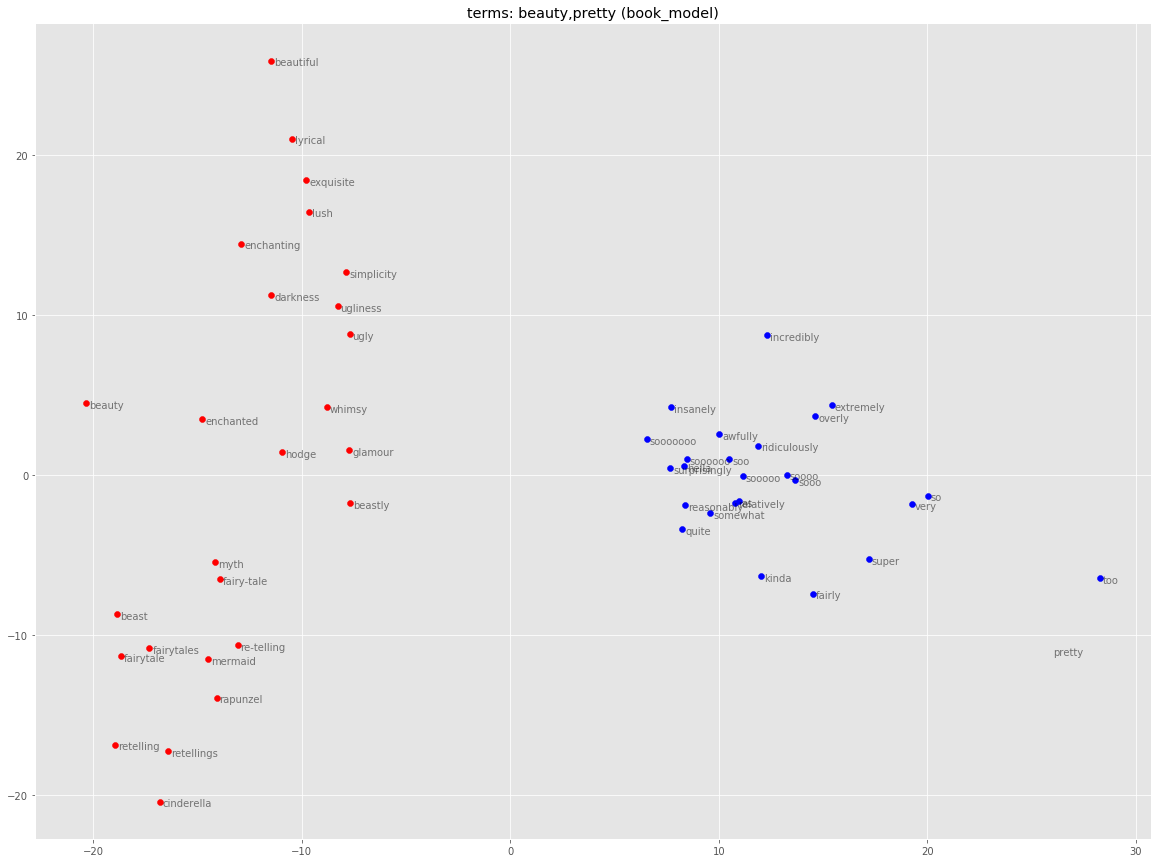

In [29]:
model_names = ["movie_model","book_model"]
interact(scatter_terms, 
         term1="beauty",
         term2="pretty",
         model_name=model_names);